In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Tree_Data.csv')
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


### To check the columns of the dataset

In [3]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [4]:
df_subset = df[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone','root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]
df_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [5]:
df_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

In [6]:
df_subset[df_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [7]:
df_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


In [8]:
df_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

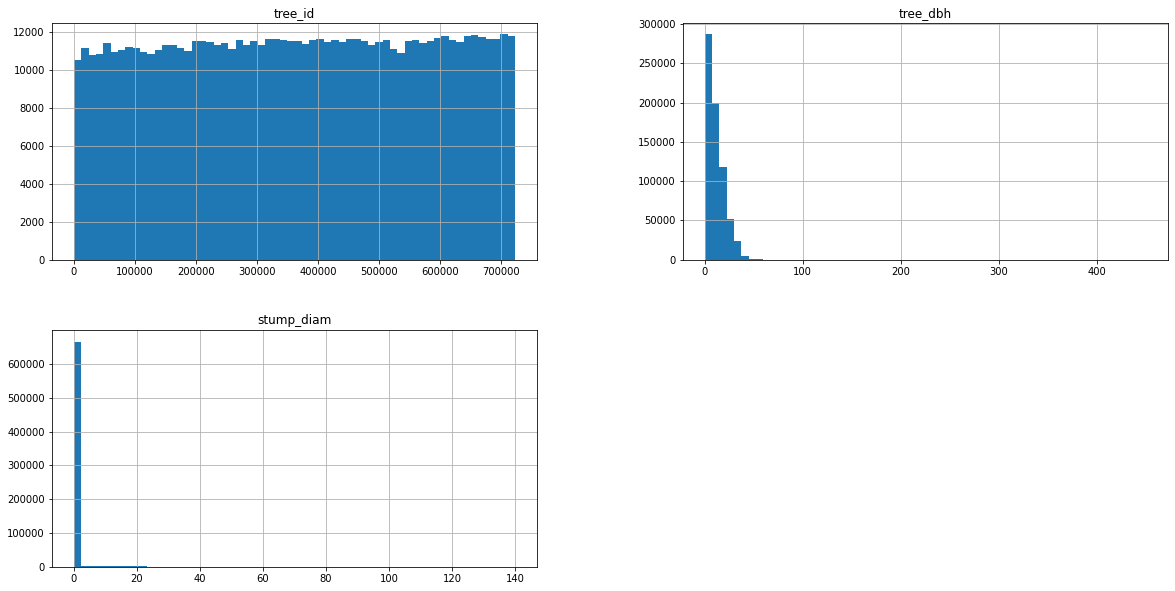

In [9]:
df_subset.hist(bins=60, figsize=(20,10))

### To check the values if they are greater than 60?


In [11]:
df_subset[df_subset['tree_dbh'] > 60]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
25862,214532,177,0,OnCurb,Alive,Fair,Robinia pseudoacacia,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


In [12]:
b_t = df_subset[df_subset['tree_dbh'] > 60]
b_t

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
25862,214532,177,0,OnCurb,Alive,Fair,Robinia pseudoacacia,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


### To plot the data set

<AxesSubplot:>

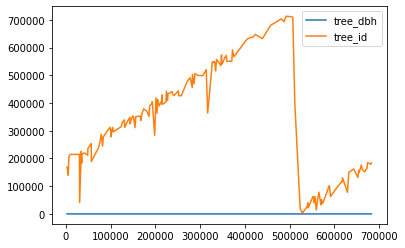

In [13]:
b_t[['tree_dbh','tree_id']].plot()

<AxesSubplot:xlabel='tree_dbh', ylabel='tree_id'>

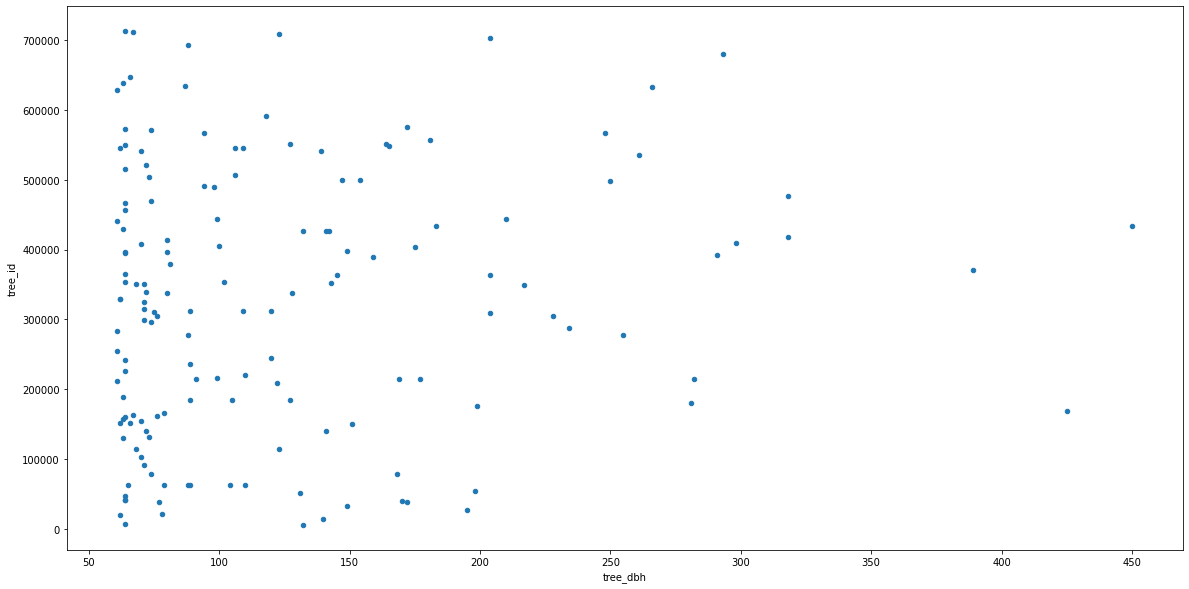

In [15]:
b_t[['tree_dbh','tree_id']].plot(kind = 'scatter', x = 'tree_dbh', y = 'tree_id', figsize= (20,10))

### Check the values of stump_diam

<AxesSubplot:>

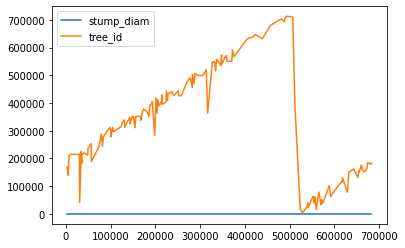

In [24]:
b_t[['stump_diam','tree_id']].plot()

In [25]:
b_t = df_subset[df_subset['stump_diam'] > 60]
b_t

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
6466,166008,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
9883,207003,0,70,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
11342,206819,0,140,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
22452,228273,0,90,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611154,116605,0,77,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
626442,97902,0,66,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
645994,135904,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
649174,154188,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='stump_diam', ylabel='tree_id'>

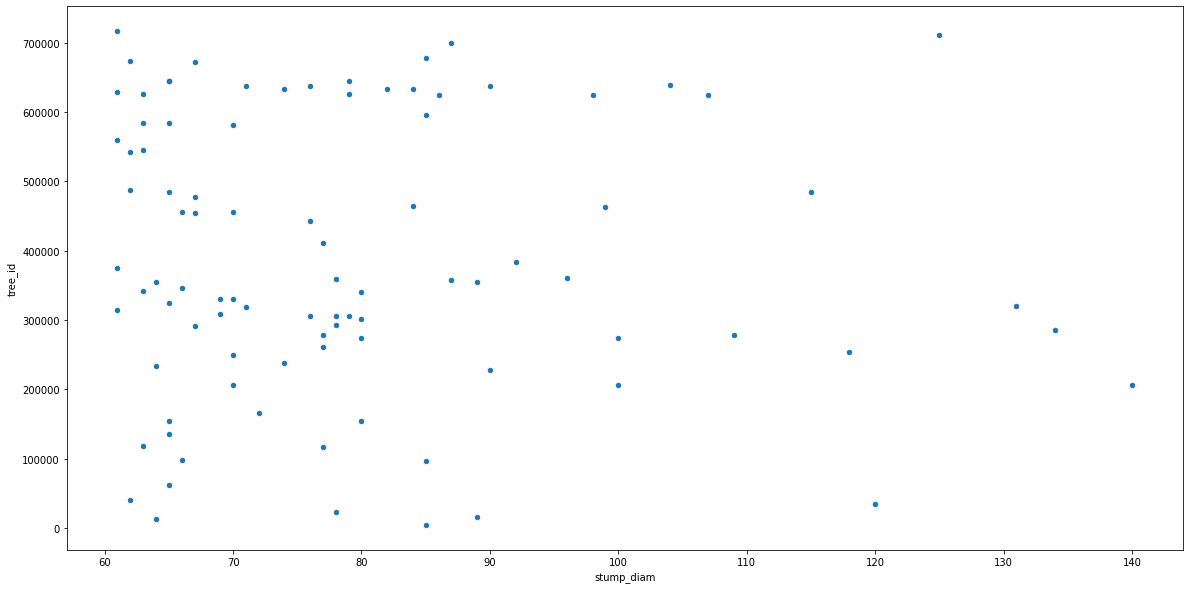

In [26]:
b_t[['stump_diam','tree_id']].plot(kind = 'scatter', x = 'stump_diam', y = 'tree_id', figsize= (20,10))

In [28]:
df_subset['spc_latin'].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64

<AxesSubplot:>

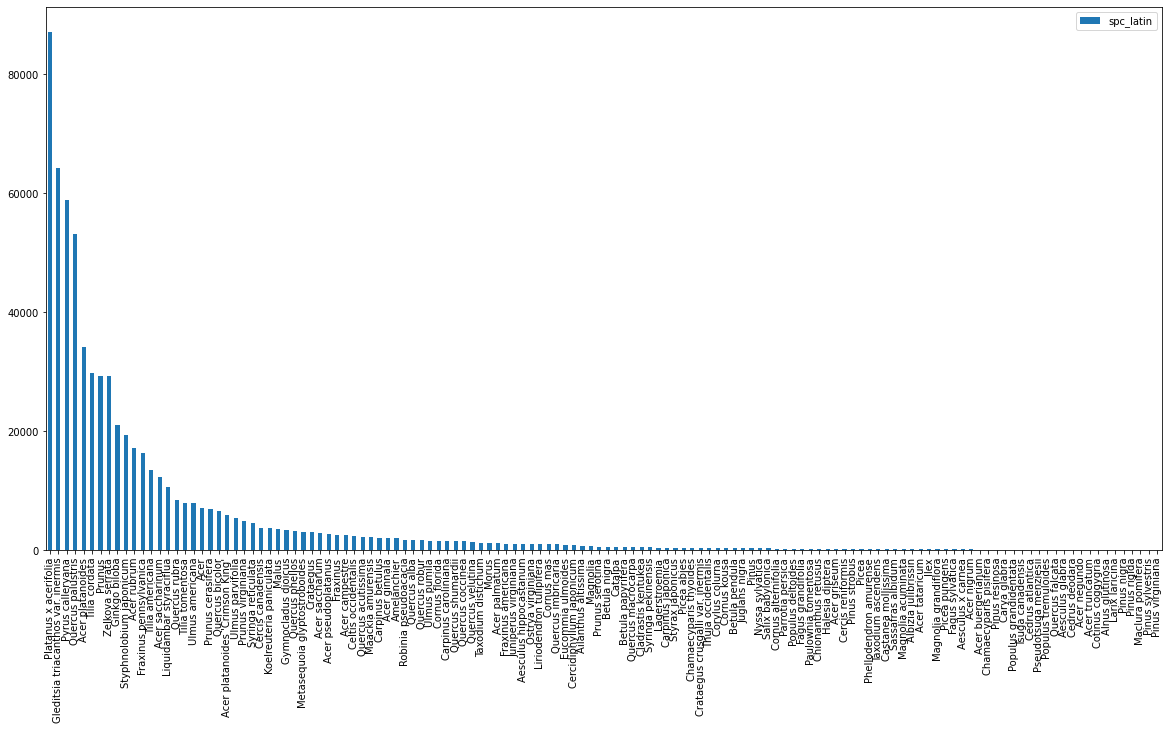

In [30]:
pd.DataFrame(df_subset['spc_latin'].value_counts()).plot(kind = 'bar', figsize= (20,10))

### To check the values for steward

In [31]:
df_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [32]:
df_subset['sidewalk'].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [33]:
df_subset['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [34]:
df_subset['curb_loc'].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

### To check the yes or no in the data set

In [35]:
tree_p = df_subset[['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
                    'brch_light', 'brch_shoe', 'brch_other']]
tree_p

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [37]:
tree_p.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


# Data Cleaning

In [41]:
mask = ((df_subset['status'] == 'Stump') | (df_subset['status'] == 'Dead'))

In [42]:
df_subset.loc[mask] = df_subset.loc[mask].fillna('Not Applicable')

e:\new folder (2)\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [43]:
df_subset[df_subset['status'] == 'Stump']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [44]:
df_subset[df_subset['status']=='Dead']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [46]:
df_subset.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [49]:
df_subset[df_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [50]:
df_subset[df_subset['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,NaN,None,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,NaN,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,NaN,1or2,Damage,None,No,No,No,No,No,No,No,No,No


In [54]:
df_subset['health'].fillna('Good', inplace = True)
df_subset['spc_latin'].fillna('none', inplace = True)
df_subset['problems'].fillna('Not observed', inplace = True)
df_subset['sidewalk'].fillna('no damage', inplace = True)

e:\new folder (2)\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
df_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [57]:
df_subset.groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2550.0,7.126275,4.437674,0.0,4.0,6.0,9.0,64.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Ulmus americana,7975.0,11.953229,9.426278,0.0,4.0,9.0,17.0,65.0
Ulmus parvifolia,5345.0,7.417587,5.867390,0.0,3.0,5.0,10.0,118.0
Ulmus pumila,1595.0,11.475862,9.903164,1.0,4.0,9.0,17.0,149.0
